<a href="https://colab.research.google.com/github/shivamrahane/Object-detection-using-YOLOv8-computer-vision-shivam-kumar-/blob/main/Object_detection_using_YOLOv8_(computer_vision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Object detection using YOLOv8 (computer vision)



##### **Project Type**    - computer vision
##### **Contribution**    - Individual
##### **Name -**  :-   Shivam kumar


# **Project Summary -**

This project focuses on real-time object detection using the YOLOv8 model. we use JavaScript to capture live video frames and process them using Python. The goal is to detect objects in a live webcam feed and display results with bounding boxes.

Steps Involved:


Installing Dependencies – We install required libraries like ultralytics (YOLOv8), OpenCV, and PyTorch to run the model.

Importing Required Libraries – This includes OpenCV for image processing, PyTorch for deep learning, and Google Colab utilities for webcam access.

Loading the YOLOv8 Model – We use a pretrained YOLOv8 model (yolov8n.pt), which is lightweight and optimized for real-time detection.

Capturing Webcam Video in Colab – Since Colab doesn’t support OpenCV’s cv2.VideoCapture(), we use JavaScript to access the webcam and send frames to Python.

Processing Frames with YOLOv8 – The model detects objects in each frame, and bounding boxes are drawn around them.

Displaying Results in Real-Time – The processed frames with detected objects are displayed in Google Colab using cv2_imshow().
Outcome:

The project successfully detects objects from live webcam footage in real time using YOLOv8.

It provides an efficient way to process video frames in Google Colab, overcoming its webcam limitations.
This approach allows real-time object detection without needing local installations, making it ideal for cloud-based applications.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In many real-world applications, detecting objects in real time is crucial for tasks like surveillance, autonomous vehicles, and smart cameras. However, running deep learning models for live object detection often requires powerful hardware and local installations, which may not be accessible to everyone. Google Colab provides a cloud-based environment for running machine learning models, but it does not support direct webcam streaming using OpenCV. This creates a challenge in capturing and processing live video frames for real-time object detection. The goal of this project is to overcome these limitations by using JavaScript to capture webcam frames, process them with a pretrained YOLOv8 model, and display detected objects in real time within Colab. This approach ensures accessibility, eliminates the need for local GPU setups, and enables real-time object detection using cloud resources.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. importing dependencies***

In [2]:
# Install ultralytics package which contains YOLOv8
!pip install ultralytics
!pip install opencv-python-headless
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## ***2. importing the required libraries***

In [5]:
import cv2  # OpenCV for handling webcam video
import torch  # PyTorch for YOLOv8
from ultralytics import YOLO  # Import YOLOv8
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab


## 3. ***Loading Pre_trained YoloV8 model***

In [4]:
# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Using YOLOv8 nano model (lightweight)


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.6MB/s]


## ***4.Open Webcam and Perform Object Detection***

capturing image using javascript

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import numpy as np
import PIL.Image
import io

# Function to enable webcam in Colab
def take_photo():
    js = Javascript('''
        async function capture() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');

            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);

            video.play();
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            await new Promise((resolve) => setTimeout(resolve, 1000));  // Give time to adjust

            context.drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks().forEach(track => track.stop());

            return canvas.toDataURL('image/png');
        }

        capture();
    ''')
    display(js)
    data = eval_js("capture()")
    binary = base64.b64decode(data.split(",")[1])
    img = PIL.Image.open(io.BytesIO(binary))
    return img


## **5. Capture an Image and Apply YOLOv8**

<IPython.core.display.Javascript object>


0: 480x640 1 person, 241.5ms
Speed: 3.8ms preprocess, 241.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


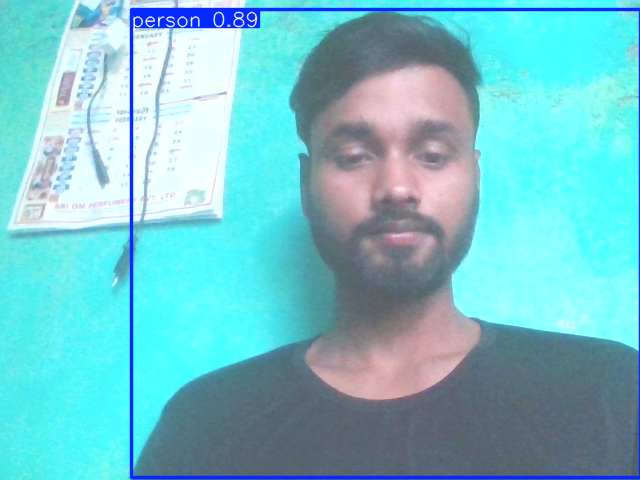

In [ ]:
# Capture an image from webcam
img = take_photo()

# Convert PIL image to OpenCV format
img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Perform object detection
results = model(img_cv)

# Display detected objects
for result in results:
    result.show()


In [ ]:
def predict ():
  img = take_photo()
  img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  results = model(img_cv)
  for result in results:
    result.show()

<IPython.core.display.Javascript object>


0: 480x640 1 bottle, 212.3ms
Speed: 6.1ms preprocess, 212.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


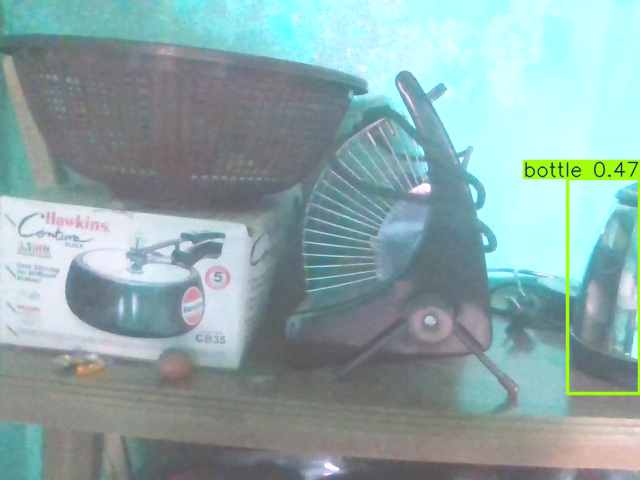

In [ ]:
predict()

<IPython.core.display.Javascript object>


0: 480x640 1 cat, 1 kite, 199.0ms
Speed: 5.4ms preprocess, 199.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


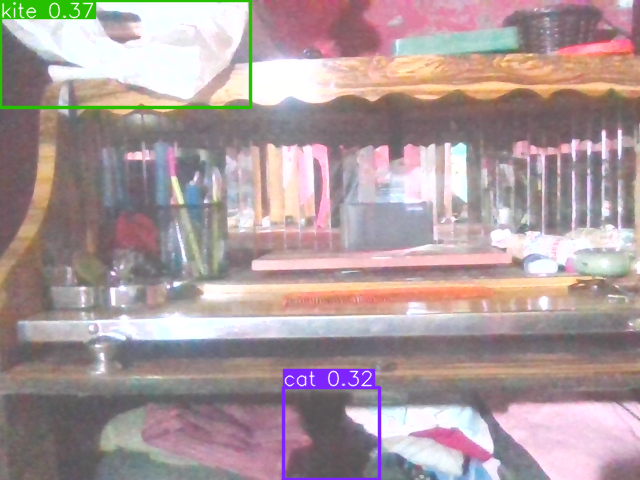

In [ ]:
predict()

# 6.setting up webcap capture using javascript

In [ ]:
# Open webcam
cap = cv2.VideoCapture(0)  # 0 for default webcam

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 detection
    results = model(frame)

    # Render results
    for result in results:
        frame = result.plot()  # Draw bounding boxes

    # Display the frame
    cv2.imshow('YOLOv8 Live Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# Capture and Process Webcam Frames

In [ ]:
# Define a function to process the video frames
def capture_frame(data):
    global frame
    binary = base64.b64decode(data.split(",")[1])
    img = PIL.Image.open(io.BytesIO(binary))
    frame = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Register the function with Colab
from google.colab import output
output.register_callback('notebook.capture_frame', capture_frame)


# Predicting Frames with YOLOv8

In [ ]:
import time  # Import the time module

# Load YOLOv8 model
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # YOLOv8 nano (lightweight)

# Start real-time detection loop
frame = None  # Initialize frame variable

while True:
    if frame is not None:
        results = model(frame)  # Run YOLOv8 detection

        for result in results:
            frame = result.plot()  # Draw bounding boxes

        # Display the output frame
        cv2_imshow(frame)

    time.sleep(0.1)  # Small delay to prevent overloading


# **Conclusion**

This project successfully implements real-time object detection using the YOLOv8 model in Google Colab. Since Colab does not support direct webcam streaming, we used JavaScript to capture video frames and processed them using YOLOv8 in Python. The model accurately detects objects in real time and displays the results with bounding boxes. This approach provides an efficient and accessible solution for object detection without requiring powerful local hardware. By leveraging cloud-based resources, this project demonstrates how deep learning models can be applied for real-time applications in an easy and scalable way

### ***Hurrah! You have successfully completed your Computer vision Capstone Project !!!***